In [119]:
import numpy as np

# variables
sampling_frequency = int(10e7)
nyquist_frequency = sampling_frequency / 2

time_interval = 0.0001
t = np.arange(0, time_interval, 1 / sampling_frequency)

modulation_frequency = 20e3# 1/s
carrier_frequency = 2e6 # 1/s
k = 2 # sensitivity

#### FM definition Wikipedia:

$$ FM(t) = A_c \cos\left(\omega_c t + \int_0^t \omega_{\Delta} x_m(t')dt'\right)$$ 

If the modulation signal consists of only a single frequency, this simplifies to 

$$ FM(t) = A_c \cos\left(\omega_c t + \frac{\omega_{\Delta}}{\omega_m}\sin(\omega_m t)\right)$$

In [120]:
# carrier signal
phi = 2 * np.pi * carrier_frequency * t + k * np.sin(2 * np.pi * modulation_frequency * t)
FM = np.cos(phi)

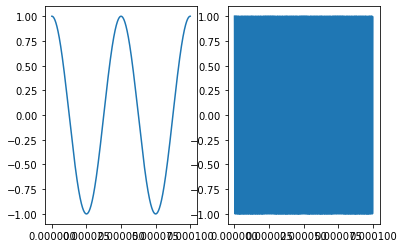

In [121]:
# plotting modulation
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
ax1.plot(t, modulation_signal)
ax2.plot(t, FM)

In [122]:
# now we will compute the fourier transform of the signal
from scipy.fft import fft,fftfreq

In [123]:
# samples
N = int(sampling_frequency * time_interval)
T = time_interval / N

# fourier coordinates
Y = fft(FM)
xf = fftfreq(N, T)[:N//2]

(1880000.0, 2120000.0)

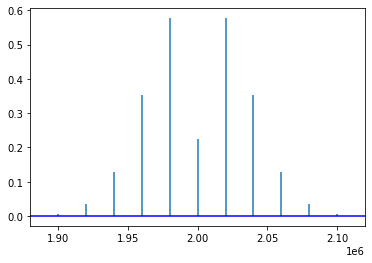

In [124]:
fig, ax = plt.subplots()
ax.stem(xf, 2.0 / N * np.abs(Y[0 : N // 2]), markerfmt = " ", basefmt = "b")
ax.set_xlim(carrier_frequency - 3 * k * modulation_frequency, carrier_frequency + 3 * k * modulation_frequency)